<font color="#138D75">**NERO Winter School training**</font> <br>
**Copyright:** (c) 2025 EUMETSAT <br>
**License:** GPL-3.0-or-later <br>
**Authors:** Andrea Meraner and Dominika Leskow-Czyżewska (EUMETSAT)
# Main script to process all satellite data sources

This script aggregates all satellite data processing scripts into one to allow the quicker and automated generation of all outputs.

In [1]:
import os
import sys
import pyproj
pyproj.datadir.set_data_dir(os.path.join(sys.prefix, 'share', 'proj'))

# start should be either :00 or :30 minutes to allow the correct retrieval of both MSG and MTG data
start_time = "2024-09-15T12:00:00"
end_time = "2024-09-20T23:59:59"

# Define the latitudes and longitudes of the bounding box
W = -9.3
S = 40
E = -7.0
N = 41.2

lonlat_bbox = [W, S, E, N]
lonlat_bbox_str = f"{W}, {S}, {E}, {N}"

run_name = "aveiro_penalva"

output_dir = './ref_data/'

## Imagery

Landsat 8/9 and Sentinel-2

In [4]:
from landsat_sentinel2_img_earthdata_script import main_earthdata

composites_dict = {
    'SWIR-composite': {
        'Sentinel2': ['B12', 'B8A', 'B04'],
        'Landsat89': ['B07', 'B05', 'B04']
    }
}
main_earthdata(start_time, end_time, lonlat_bbox, output_dir, run_name, composites_dict)

No results found for query. Exiting.


Sentinel-2 (full-res but daily)

In [ ]:
from sentinel2_openeo_script import main_sentinel2

bands = ["B08", "B04", "B03", "B02", "B12"]
main_sentinel2(start_time, end_time, W, S, E, N, bands, output_dir, run_name)

Sentinel-3

In [ ]:
from sentinel3_imagery_script import main_sentinel3

#main_sentinel3('SLSTR_SOLAR', start_time, end_time, W,S,E,N, output_dir, run_name)
#main_sentinel3('SLSTR_THERMAL', start_time, end_time, W,S,E,N, output_dir, run_name)
main_sentinel3('OLCI', start_time, end_time, W, S, E, N, output_dir, run_name)

FCI imagery

In [2]:
input_dir = 'satellite_data/fci_data/202409_Aveiro_Penalva/'
remote_files = True
datasets = ['nir_22', 'ir_38', 'fire_temperature', 'true_color']
process_RC_every_minutes=30

from fci_satpy_script import main_fci

main_fci(input_dir, datasets, start_time, end_time, lonlat_bbox, output_dir, run_name, remote_files, process_RC_every_minutes)

Processing 2024-09-16 12:00:00...
Found 2 filenames


The following datasets were not created and may require resampling to be generated: DataID(name='fire_temperature'), DataID(name='true_color')


Processing 2024-09-16 12:30:00...
Found 2 filenames


KeyboardInterrupt: 

## Active Fires

MSG FRP-PIXEL

Initialising processing
Processing new day: 2024-09-16
Processing slot 2024-09-16 12:00:00, found 29 points.
Processing slot 2024-09-16 12:15:00, found 27 points.
Processing slot 2024-09-16 12:30:00, found 24 points.
Processing slot 2024-09-16 12:45:00, found 22 points.
Processing slot 2024-09-16 13:00:00, found 23 points.
Processing slot 2024-09-16 13:15:00, found 22 points.
Processing slot 2024-09-16 13:30:00, found 21 points.
Processing slot 2024-09-16 13:45:00, found 23 points.
Processing slot 2024-09-16 14:00:00, found 26 points.
Processing slot 2024-09-16 14:15:00, found 26 points.
Processing slot 2024-09-16 14:30:00, found 19 points.
Processing slot 2024-09-16 14:45:00, found 18 points.
Processing slot 2024-09-16 15:00:00, found 19 points.
Processing slot 2024-09-16 15:15:00, found 20 points.
Processing slot 2024-09-16 15:30:00, found 18 points.
Processing slot 2024-09-16 15:45:00, found 29 points.
Processing slot 2024-09-16 16:00:00, found 25 points.
Processing slot 2024-09-16 

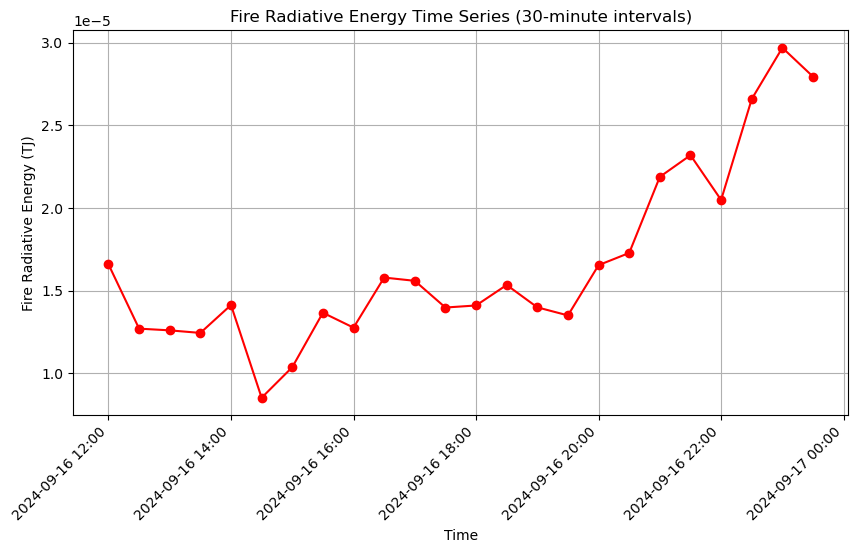

Processing new day: 2024-09-17
Processing slot 2024-09-17 00:00:00, found 34 points.
Processing slot 2024-09-17 00:15:00, found 46 points.
Processing slot 2024-09-17 00:30:00, found 45 points.
Processing slot 2024-09-17 00:45:00, found 43 points.
Processing slot 2024-09-17 01:00:00, found 49 points.
Processing slot 2024-09-17 01:15:00, found 39 points.
Processing slot 2024-09-17 01:30:00, found 31 points.
Processing slot 2024-09-17 01:45:00, found 45 points.
Processing 332 points for day 2024-09-17. Writing shapefile and plot to ./ref_data/aveiro_penalva/Satellite_ActiveFires/MSG
Filtered shapefile written to: ./ref_data/aveiro_penalva/Satellite_ActiveFires/MSG/2024-09-17_lsasaf_msg_frppixel.shp
Saved FRE time series plot to: ./ref_data/aveiro_penalva/Satellite_ActiveFires/MSG/2024-09-17_fre_timeseries.png


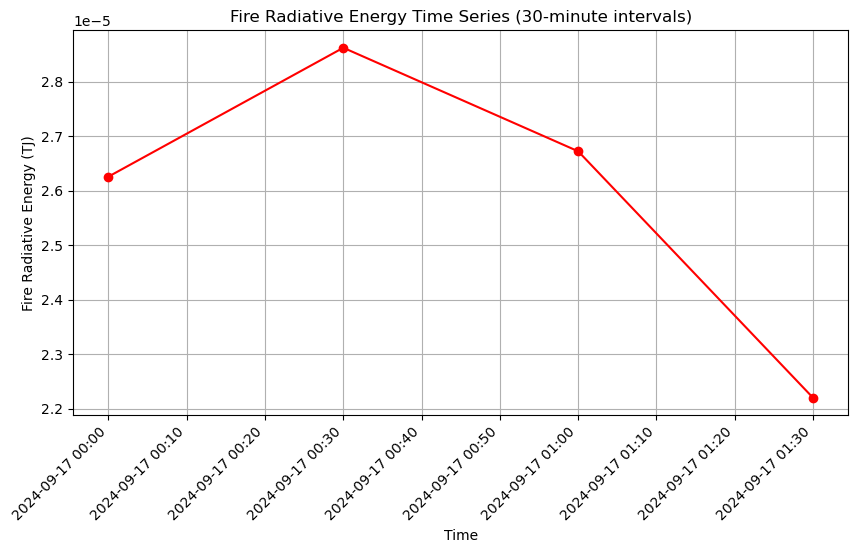

Finished processing all times
Processing 1780 points for the entire time range from 2024-09-16T12:00:00 to 2024-09-17T01:59:59. Writing shapefile and plot to ./ref_data/aveiro_penalva/Satellite_ActiveFires/MSG
Filtered shapefile written to: ./ref_data/aveiro_penalva/Satellite_ActiveFires/MSG/full_range_2024-09-16T12:00:00_2024-09-17T01:59:59_lsasaf_msg_frppixel.shp
Saved FRE time series plot to: ./ref_data/aveiro_penalva/Satellite_ActiveFires/MSG/full_range_2024-09-16T12:00:00_2024-09-17T01:59:59_fre_timeseries.png


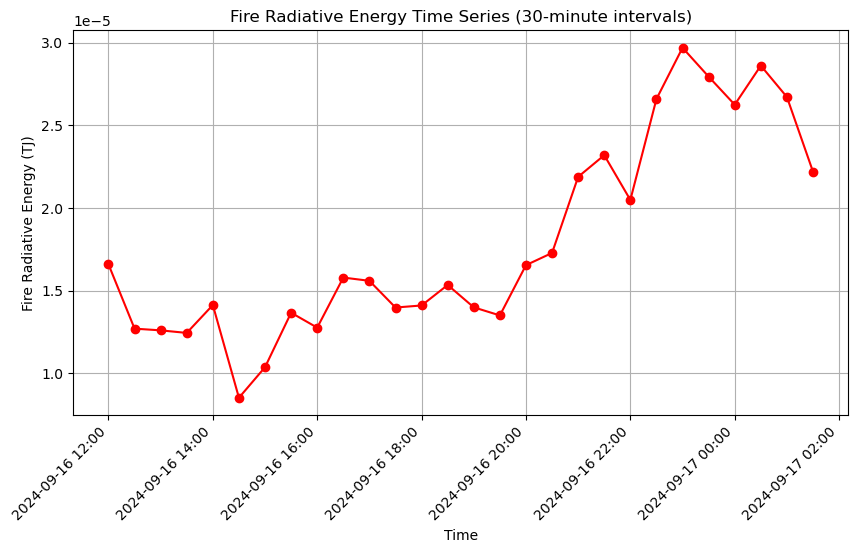

In [2]:
from msg_frppixel_script import main_lsasaf

main_lsasaf(start_time, end_time, lonlat_bbox, output_dir, run_name)

MODIS-VIIRS from FIRMS

In [ ]:
from firms_script import main_firms

main_firms(start_time, end_time, lonlat_bbox, output_dir, run_name)

Sentinel-3

In [ ]:

from sentinel3_fire_script import main_sentinel3_frp

main_sentinel3_frp(start_time, end_time, lonlat_bbox_str, output_dir, run_name)

### Zip the outputs
At last, zip the output for easier download

In [ ]:
from tools import zip_output_folder

folder_to_zip = os.path.join(output_dir, run_name)
output_zip_filename = os.path.join(output_dir, f"{run_name}.zip")  # or input a manual name

zip_output_folder(folder_to_zip, output_zip_filename)